In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from collections import Counter
import os
import re
import sys
import math
sys.path.append(r'D:\conda_envs\mypackages\pyvenn-master')
%matplotlib inline
import venn
import gc

In [4]:
print(os.getcwd())

D:\sorf_models\model\tests


In [5]:
vectors_list=[]
raw_vectors_list=[]
transcripts_list=[]
TPMs_list=[]
runs=["SRR592959_multimap","SRR592960_multimap","SRR1630828_multimap","SRR1630829_multimap","SRR1630830_multimap"]
for i in runs:
    with open(i+'/used_vectors.pkl','rb') as file:
        vectors_list.append(pickle.load(file))
    with open(i+'/used_raw_vectors.pkl','rb') as file:
        raw_vectors_list.append(pickle.load(file))
    with open(i+'/used_transcripts.pkl','rb') as file:
        transcripts_list.append(pickle.load(file))
    with open(i+'/used_TPMs.pkl','rb') as file:
        TPMs_list.append(pickle.load(file))

In [6]:
print(len(vectors_list))
print(len(transcripts_list))

5
5


(<Figure size 864x672 with 1 Axes>, <AxesSubplot:>)

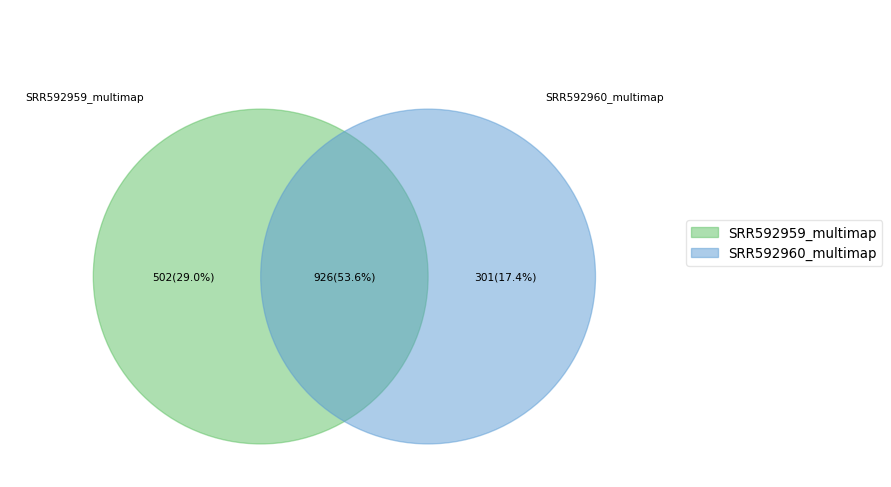

In [7]:
#venn before
labels = venn.get_labels(transcripts_list[0:2], fill=['number','percent'])
venn.venn2(labels, names=runs[0:2], fontsize=8)

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

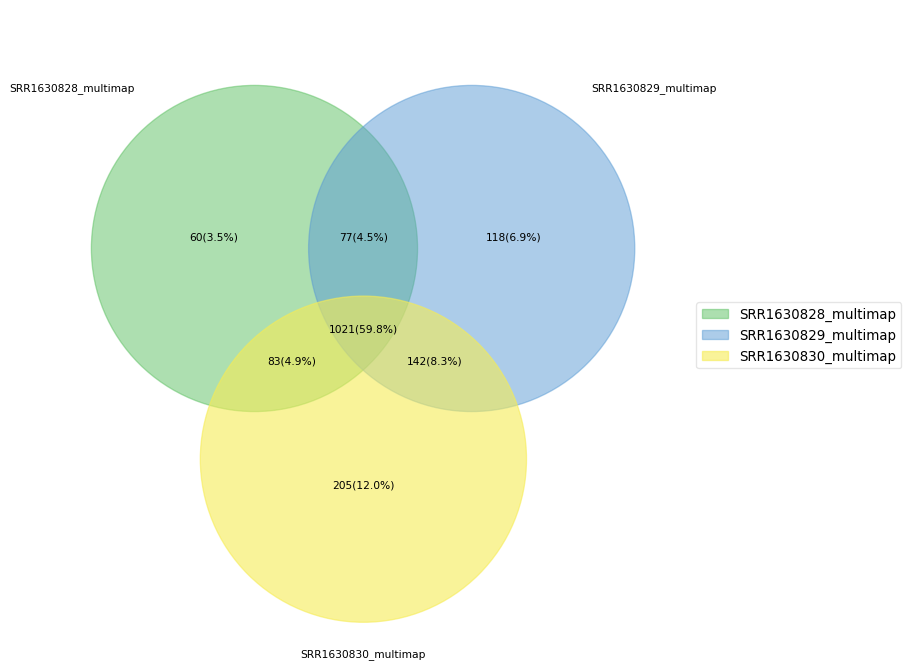

In [8]:
#venn before
labels = venn.get_labels(transcripts_list[2:5], fill=['number','percent'])
venn.venn3(labels, names=runs[2:5], fontsize=8)

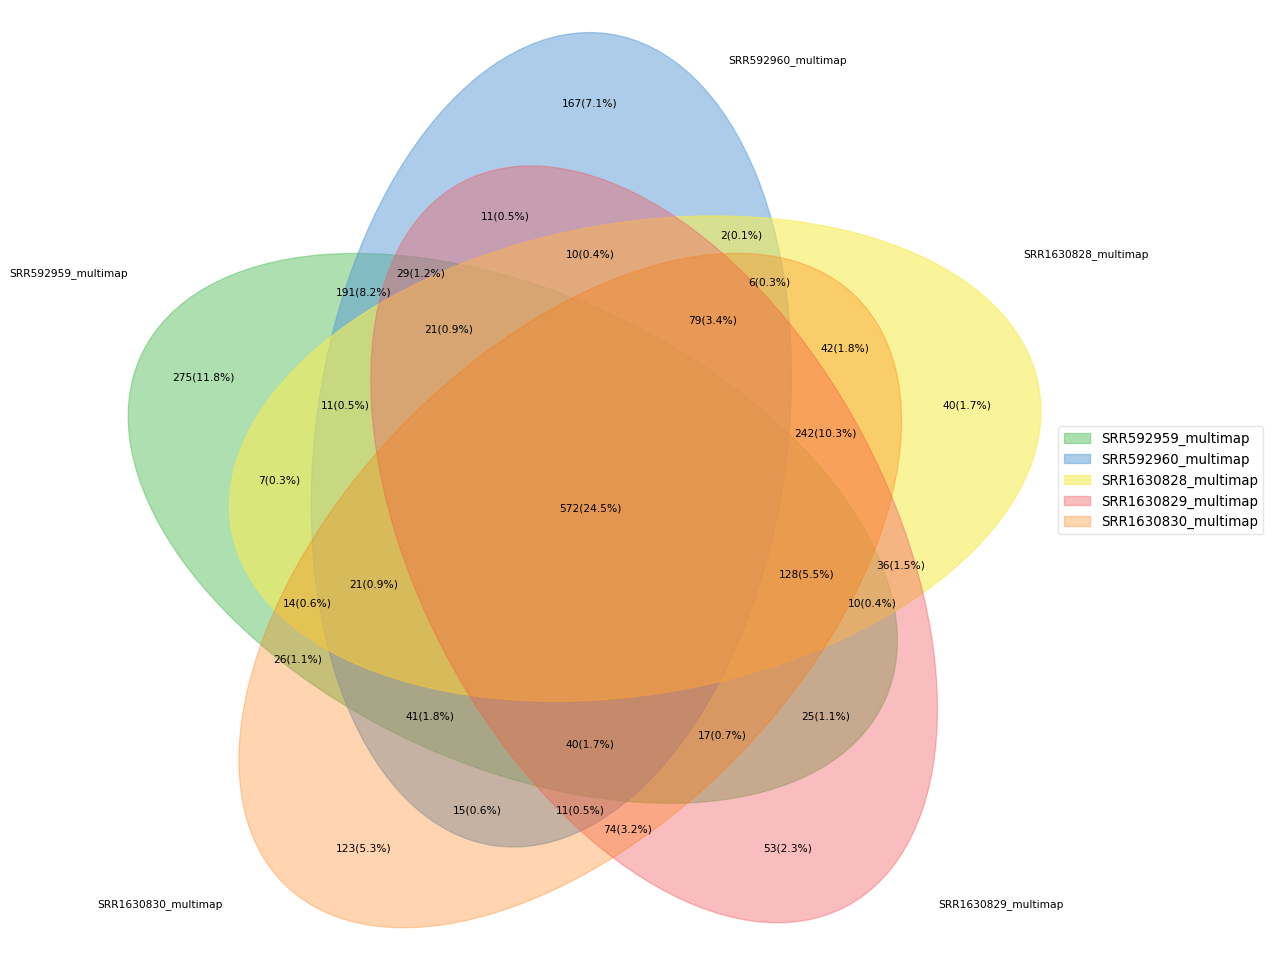

In [9]:
#venn before
labels = venn.get_labels(transcripts_list, fill=['number','percent'])
fig,ax = venn.venn5(labels, names=runs, fontsize=8)
fig.savefig('Venn5_before.pdf',bbox_inches="tight",pad_inches=1)

In [10]:
print([len(i) for i in transcripts_list])

[1428, 1227, 1241, 1358, 1451]


In [11]:
intersect_transcripts=[i for i in transcripts_list[0] if (i in transcripts_list[1]) and (i in transcripts_list[2]) and (i in transcripts_list[3]) and (i in transcripts_list[4])]
print(len(intersect_transcripts))

572


In [12]:
index0=np.array([[i for i in range(len(transcripts_list[0])) if transcripts_list[0][i]==j][0] for j in intersect_transcripts])
index1=np.array([[i for i in range(len(transcripts_list[1])) if transcripts_list[1][i]==j][0] for j in intersect_transcripts])
index2=np.array([[i for i in range(len(transcripts_list[2])) if transcripts_list[2][i]==j][0] for j in intersect_transcripts])
index3=np.array([[i for i in range(len(transcripts_list[3])) if transcripts_list[3][i]==j][0] for j in intersect_transcripts])
index4=np.array([[i for i in range(len(transcripts_list[4])) if transcripts_list[4][i]==j][0] for j in intersect_transcripts])
v0=[vectors_list[0][i] for i in index0]
v1=[vectors_list[1][i] for i in index1]
v2=[vectors_list[2][i] for i in index2]
v3=[vectors_list[3][i] for i in index3]
v4=[vectors_list[4][i] for i in index4]

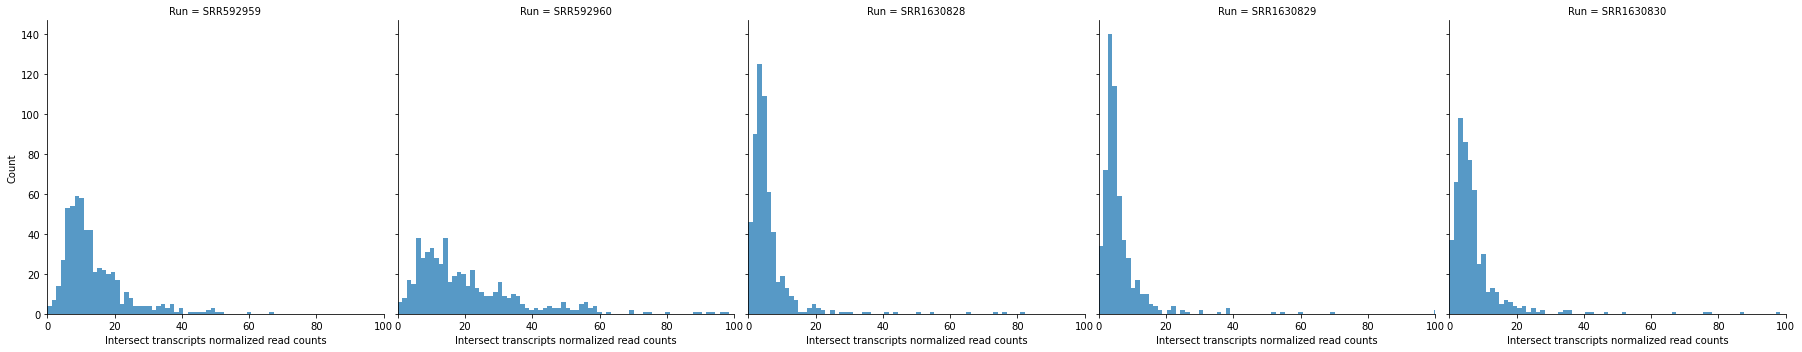

In [13]:
plotdata={'Intersect transcripts normalized read counts': np.hstack((np.array([sum(i) for i in v0]),np.array([sum(i) for i in v1]),np.array([sum(i) for i in v2]),np.array([sum(i) for i in v3]),np.array([sum(i) for i in v4]))),
         'Run': np.hstack((np.array(["SRR592959" for i in range(len(v0))]),np.array(["SRR592960" for i in range(len(v1))]),np.array(["SRR1630828" for i in range(len(v2))]),np.array(["SRR1630829" for i in range(len(v3))]),np.array(["SRR1630830" for i in range(len(v4))])))}

sns.displot(plotdata,x='Intersect transcripts normalized read counts',col='Run').set(xlim=(0,100))

In [14]:
#按照共有转录本的均值对每个run进行标准化
va=[(v0[i]+v1[i]+v2[i]+v3[i]+v4[i])/5 for i in range(len(v0))]
ratio=np.median(np.array([sum(va[i])/sum(v0[i]) for i in range(len(v0))]))
print("run signal median ratio SRR592959:",ratio)
vectors_list[0]=[i*ratio for i in vectors_list[0]]
v0=[vectors_list[0][i] for i in index0]

ratio=np.median(np.array([sum(va[i])/sum(v1[i]) for i in range(len(v1))]))
print("run signal median ratio SRR592960:",ratio)
vectors_list[1]=[i*ratio for i in vectors_list[1]]
v1=[vectors_list[1][i] for i in index1]

ratio=np.median(np.array([sum(va[i])/sum(v2[i]) for i in range(len(v2))]))
print("run signal median ratio SRR1630828:",ratio)
vectors_list[2]=[i*ratio for i in vectors_list[2]]
v2=[vectors_list[2][i] for i in index2]

ratio=np.median(np.array([sum(va[i])/sum(v3[i]) for i in range(len(v3))]))
print("run signal median ratio SRR1630829:",ratio)
vectors_list[3]=[i*ratio for i in vectors_list[3]]
v3=[vectors_list[3][i] for i in index3]

ratio=np.median(np.array([sum(va[i])/sum(v4[i]) for i in range(len(v4))]))
print("run signal median ratio SRR1630830:",ratio)
vectors_list[4]=[i*ratio for i in vectors_list[4]]
v4=[vectors_list[4][i] for i in index4]

run signal median ratio SRR592959: 0.7418162833875241
run signal median ratio SRR592960: 0.5230459250076311
run signal median ratio SRR1630828: 2.024554257297588
run signal median ratio SRR1630829: 1.897830665935473
run signal median ratio SRR1630830: 1.6371193968380946


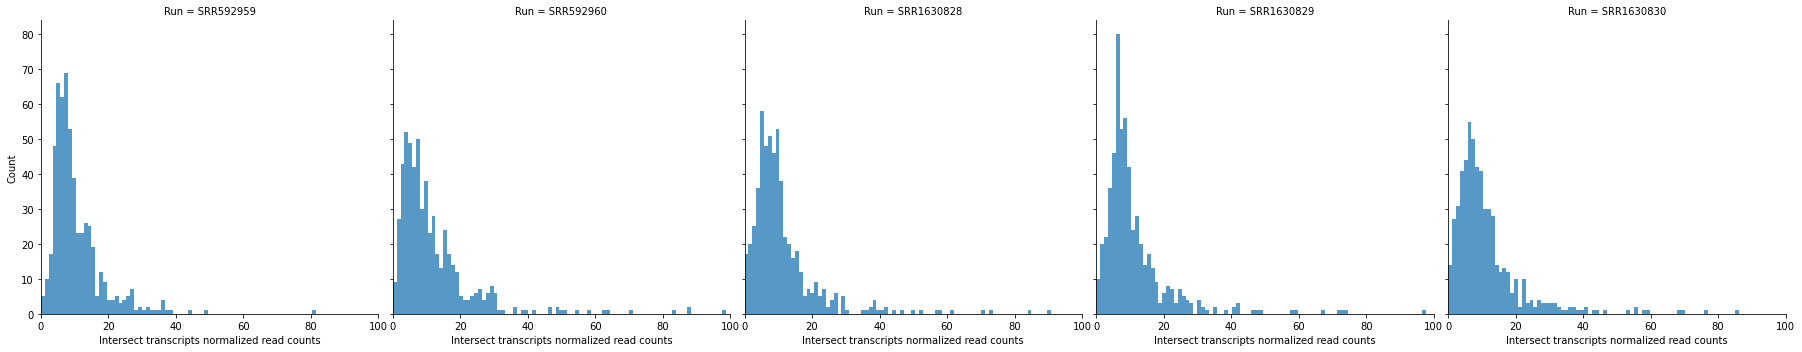

In [15]:
plotdata={'Intersect transcripts normalized read counts': np.hstack((np.array([sum(i) for i in v0]),np.array([sum(i) for i in v1]),np.array([sum(i) for i in v2]),np.array([sum(i) for i in v3]),np.array([sum(i) for i in v4]))),
         'Run': np.hstack((np.array(["SRR592959" for i in range(len(v0))]),np.array(["SRR592960" for i in range(len(v1))]),np.array(["SRR1630828" for i in range(len(v2))]),np.array(["SRR1630829" for i in range(len(v3))]),np.array(["SRR1630830" for i in range(len(v4))])))}

sns.displot(plotdata,x='Intersect transcripts normalized read counts',col='Run').set(xlim=(0,100))

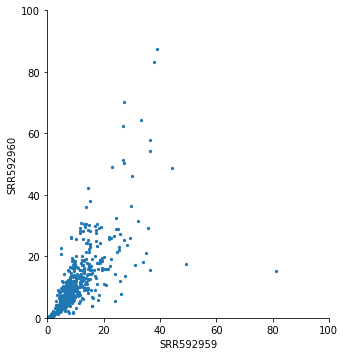

In [16]:
plotdata=pd.DataFrame({'SRR592959': np.array([sum(i) for i in v0]),
                     'SRR592960': np.array([sum(i) for i in v1])})
sns.lmplot(data=plotdata,x='SRR592959',y='SRR592960',fit_reg=False,scatter_kws={"s": 5, "alpha": 1}).set(xlim=(0,100),ylim=(0,100))

In [98]:
def find_TIS(seq,max_TIS_count=0):
    pattern=re.compile(r'(?=(ATG|TTG|CTG|GTG|AAG|ACG|AGG|ATA|ATT|ATC))')
    it=re.finditer(pattern,seq)
    pos=[i.span()[0] for i in it]
    if max_TIS_count==0:
        return pos
    else:
        return pos[0:max_TIS_count]

In [18]:
def read_fasta(input): #用def定义函数read_fasta()，并向函数传递参数用变量input接收
    with open(input,'r') as f: # 打开文件
        fasta = {} # 定义一个空的字典
        for line in f:
            line = line.strip() # 去除末尾换行符
            if line[0] == '>':
                header = line[1:]
            else:
                sequence = line
                fasta[header] = fasta.get(header,'') + sequence
    return fasta
fa=read_fasta('gencode.v38.annotation.gff3_gffreadto_simple_plane_new.fa')

In [19]:
#对于共有的transcript，以TPM为权重合并normalized_vectors
all_transcripts0=np.unique(np.hstack((transcripts_list[0],transcripts_list[1],transcripts_list[2],transcripts_list[3],transcripts_list[4])))
all_transcripts0=[str(i) for i in all_transcripts0]
all_transcripts=[]
all_vectors=[]
all_raw_vectors=[]
all_TPMs=[]
for ii in all_transcripts0:
    final_vector=0
    final_raw_vector=0
    TPMs=[]
    if ii in transcripts_list[0]:
        index=[i for i in range(len(transcripts_list[0])) if transcripts_list[0][i]==ii][0]
        final_vector += TPMs_list[0][index]*vectors_list[0][index]
        final_raw_vector += raw_vectors_list[0][index]
        TPMs.append(TPMs_list[0][index])
    if ii in transcripts_list[1]:
        index=[i for i in range(len(transcripts_list[1])) if transcripts_list[1][i]==ii][0]
        final_vector += TPMs_list[1][index]*vectors_list[1][index]
        final_raw_vector += raw_vectors_list[1][index]
        TPMs.append(TPMs_list[1][index])
    if ii in transcripts_list[2]:
        index=[i for i in range(len(transcripts_list[2])) if transcripts_list[2][i]==ii][0]
        final_vector += TPMs_list[2][index]*vectors_list[2][index]
        final_raw_vector += raw_vectors_list[2][index]
        TPMs.append(TPMs_list[2][index])
    if ii in transcripts_list[3]:
        index=[i for i in range(len(transcripts_list[3])) if transcripts_list[3][i]==ii][0]
        final_vector += TPMs_list[3][index]*vectors_list[3][index]
        final_raw_vector += raw_vectors_list[3][index]
        TPMs.append(TPMs_list[3][index])
    if ii in transcripts_list[4]:
        index=[i for i in range(len(transcripts_list[4])) if transcripts_list[4][i]==ii][0]
        final_vector += TPMs_list[4][index]*vectors_list[4][index]
        final_raw_vector += raw_vectors_list[4][index]
        TPMs.append(TPMs_list[4][index])
    first_50_TIS_final_raw=final_raw_vector[find_TIS(fa[ii],50)]
    if max(first_50_TIS_final_raw)>=6 and sum(first_50_TIS_final_raw)>=10 and sum((final_vector/sum(TPMs))[find_TIS(fa[ii],50)])<=math.inf:
        all_transcripts.append(ii)
        all_vectors.append(final_vector/sum(TPMs))
        all_raw_vectors.append(final_raw_vector)
        all_TPMs.append(sum(TPMs)/len(TPMs))

In [20]:
# exp=233
# print(all_transcripts[exp])
# print(fa[all_transcripts[exp]])
# print(find_TIS(fa[all_transcripts[exp]],50))
# print(all_raw_vectors[exp][find_TIS(fa[all_transcripts[exp]],50)])

In [21]:
print(len(all_transcripts0))
print(len(all_transcripts))

2339
1639


In [22]:
plotdata=np.array([sum(all_vectors[i][find_TIS(fa[all_transcripts[i]],50)]) for i in range(len(all_transcripts))])

[(0.0, 50.0)]

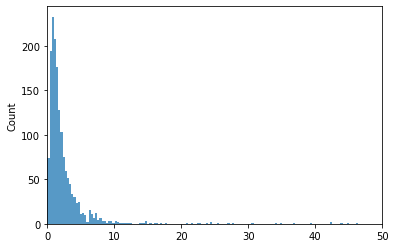

In [23]:
sns.histplot(data=plotdata).set(xlim=(0,50))

In [24]:
plotdata=pd.DataFrame({'TPM': np.array(all_TPMs),
    'Signal': np.array([sum(all_vectors[i][find_TIS(fa[all_transcripts[i]],50)]) for i in range(len(all_transcripts))])})
plotdata

,TPM,Signal
0,54.363760,0.794662
1,38.895877,0.477735
2,9.073718,7.357895
3,17.107307,6.220310
4,13.766112,0.719899
...,...,...
1634,14.451654,1.353312
1635,29.497072,2.729300
1636,2.484356,5.263395
1637,6.874820,1.751082


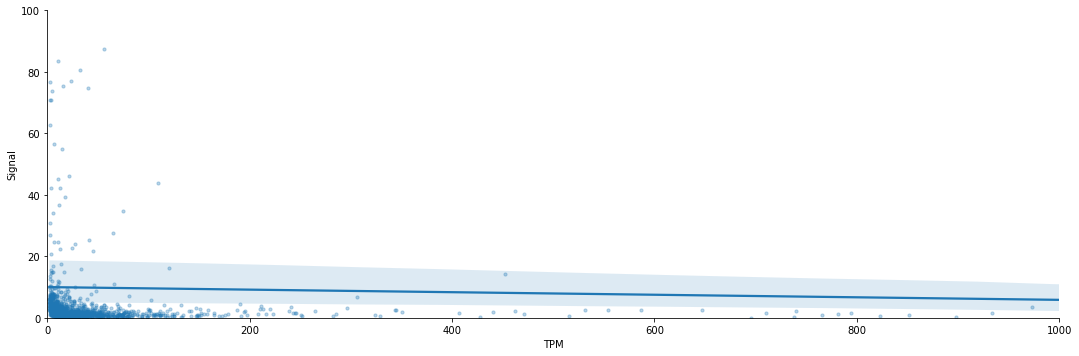

In [25]:
sns.lmplot(data=plotdata,x='TPM',y='Signal',scatter_kws={"s": 10, "alpha": 0.3},aspect=3).set(xlim=(0,1000),ylim=(0,100))

In [26]:
def inspect(inspect_index):
    print('test:',inspect_index)
    print(all_transcripts[inspect_index])
    print('TPM:',all_TPMs[inspect_index])
    print('sum signal:',sum(all_vectors[inspect_index]))
    print('sum first 50 TIS signal:',sum(all_vectors[inspect_index][find_TIS(fa[all_transcripts[inspect_index]],50)]))
    np.savetxt('inspect.txt',all_vectors[inspect_index],header=all_transcripts[inspect_index])

In [27]:
meta=pd.read_csv('gencode_transcript_meta.txt',sep='\t',header=None)
meta.columns=['ID','Parent','transcript_id','gene_id','gene_type','gene_name','transcript_type','transcript_name']

In [28]:
used_meta=pd.DataFrame(data=all_transcripts,columns=['ID']).merge(meta,on='ID',how='left')
used_meta

,ID,Parent,transcript_id,gene_id,gene_type,gene_name,transcript_type,transcript_name
0,ENST00000000412.8,ENSG00000003056.8,ENST00000000412.8,ENSG00000003056.8,protein_coding,M6PR,protein_coding,M6PR-201
1,ENST00000002165.11,ENSG00000001036.14,ENST00000002165.11,ENSG00000001036.14,protein_coding,FUCA2,protein_coding,FUCA2-201
2,ENST00000004982.6,ENSG00000004776.13,ENST00000004982.6,ENSG00000004776.13,protein_coding,HSPB6,protein_coding,HSPB6-201
3,ENST00000006015.4,ENSG00000005073.6,ENST00000006015.4,ENSG00000005073.6,protein_coding,HOXA11,protein_coding,HOXA11-201
4,ENST00000007390.3,ENSG00000007520.4,ENST00000007390.3,ENSG00000007520.4,protein_coding,TSR3,protein_coding,TSR3-201
...,...,...,...,...,...,...,...,...
1634,ENST00000673968.1,ENSG00000198728.11,ENST00000673968.1,ENSG00000198728.11,protein_coding,LDB1,protein_coding,LDB1-204
1635,ENST00000676193.1,ENSG00000185900.11,ENST00000676193.1,ENSG00000185900.11,protein_coding,POMK,protein_coding,POMK-219
1636,ENST00000677770.1,ENSG00000288654.1,ENST00000677770.1,ENSG00000288654.1,protein_coding,RP11-159G9.5,protein_coding,RP11-159G9.5-001
1637,ENST00000678502.1,ENSG00000258643.6,ENST00000678502.1,ENSG00000258643.6,protein_coding,BCL2L2-PABPN1,protein_coding,BCL2L2-PABPN1-203


In [29]:
#匹配transcript_name关键词：H\d、EIF、HNRNP、MTRNR
remove_index=[i for i in range(len(all_transcripts)) if re.match(r"H\d",used_meta['transcript_name'].values[i])!=None
                or re.match(r"EIF",used_meta['transcript_name'].values[i])!=None
                or re.match(r"HNRNP",used_meta['transcript_name'].values[i])!=None
                or re.match(r"MTRNR",used_meta['transcript_name'].values[i])!=None]
print(len(remove_index),"transcripts need to be removed.")

61 transcripts need to be removed.


In [30]:
all_num=len(all_transcripts)
all_transcripts=[all_transcripts[i] for i in range(all_num) if i not in remove_index]
all_vectors=[all_vectors[i] for i in range(all_num) if i not in remove_index]
all_raw_vectors=[all_raw_vectors[i] for i in range(all_num) if i not in remove_index]
all_TPMs=[all_TPMs[i] for i in range(all_num) if i not in remove_index]
print("before:",all_num)
print("after:",len(all_transcripts))

before: 1639
after: 1578


In [31]:
used_meta=pd.DataFrame(data=all_transcripts,columns=['ID']).merge(meta,on='ID',how='left')
used_meta

,ID,Parent,transcript_id,gene_id,gene_type,gene_name,transcript_type,transcript_name
0,ENST00000000412.8,ENSG00000003056.8,ENST00000000412.8,ENSG00000003056.8,protein_coding,M6PR,protein_coding,M6PR-201
1,ENST00000002165.11,ENSG00000001036.14,ENST00000002165.11,ENSG00000001036.14,protein_coding,FUCA2,protein_coding,FUCA2-201
2,ENST00000004982.6,ENSG00000004776.13,ENST00000004982.6,ENSG00000004776.13,protein_coding,HSPB6,protein_coding,HSPB6-201
3,ENST00000006015.4,ENSG00000005073.6,ENST00000006015.4,ENSG00000005073.6,protein_coding,HOXA11,protein_coding,HOXA11-201
4,ENST00000007390.3,ENSG00000007520.4,ENST00000007390.3,ENSG00000007520.4,protein_coding,TSR3,protein_coding,TSR3-201
...,...,...,...,...,...,...,...,...
1573,ENST00000673968.1,ENSG00000198728.11,ENST00000673968.1,ENSG00000198728.11,protein_coding,LDB1,protein_coding,LDB1-204
1574,ENST00000676193.1,ENSG00000185900.11,ENST00000676193.1,ENSG00000185900.11,protein_coding,POMK,protein_coding,POMK-219
1575,ENST00000677770.1,ENSG00000288654.1,ENST00000677770.1,ENSG00000288654.1,protein_coding,RP11-159G9.5,protein_coding,RP11-159G9.5-001
1576,ENST00000678502.1,ENSG00000258643.6,ENST00000678502.1,ENSG00000258643.6,protein_coding,BCL2L2-PABPN1,protein_coding,BCL2L2-PABPN1-203


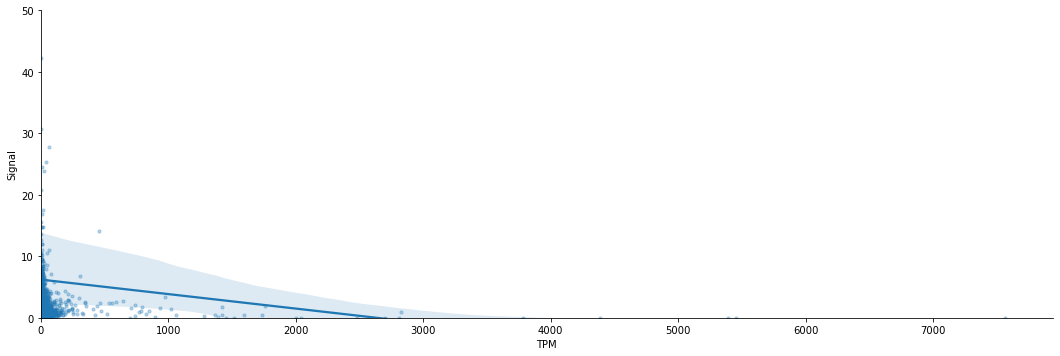

In [32]:
plotdata=pd.DataFrame({'TPM': np.array(all_TPMs),
    'Signal': np.array([sum(all_vectors[i][find_TIS(fa[all_transcripts[i]],50)]) for i in range(len(all_transcripts))])})
sns.lmplot(data=plotdata,x='TPM',y='Signal',scatter_kws={"s": 10, "alpha": 0.3},aspect=3).set(xlim=(0,None),ylim=(0,50))

In [33]:
#查看那些极端的的转录本：
high_index=[i for i in range(len(all_vectors)) if sum(all_vectors[i][find_TIS(fa[all_transcripts[i]],50)])>10]
print('There are',len(high_index),'high signal transcripts.')

There are 29 high signal transcripts.


In [34]:
used_meta.iloc[high_index]

,ID,Parent,transcript_id,gene_id,gene_type,gene_name,transcript_type,transcript_name
28,ENST00000202017.6,ENSG00000088356.6,ENST00000202017.6,ENSG00000088356.6,protein_coding,PDRG1,protein_coding,PDRG1-201
37,ENST00000215770.6,ENSG00000099974.8,ENST00000215770.6,ENSG00000099974.8,protein_coding,DDTL,protein_coding,DDTL-201
85,ENST00000222224.4,ENSG00000105617.4,ENST00000222224.4,ENSG00000105617.4,protein_coding,LENG1,protein_coding,LENG1-201
107,ENST00000225964.10,ENSG00000108821.14,ENST00000225964.10,ENSG00000108821.14,protein_coding,COL1A1,protein_coding,COL1A1-201
169,ENST00000242351.10,ENSG00000105939.14,ENST00000242351.10,ENSG00000105939.14,protein_coding,ZC3HAV1,protein_coding,ZC3HAV1-201
704,ENST00000320868.9,ENSG00000206172.8,ENST00000320868.9,ENSG00000206172.8,protein_coding,HBA1,protein_coding,HBA1-201
804,ENST00000338146.7,ENSG00000176422.14,ENST00000338146.7,ENSG00000176422.14,protein_coding,SPRYD4,protein_coding,SPRYD4-201
1077,ENST00000372491.4,ENSG00000188483.8,ENST00000372491.4,ENSG00000188483.8,protein_coding,IER5L,protein_coding,IER5L-201
1287,ENST00000396403.9,ENSG00000198346.11,ENST00000396403.9,ENSG00000198346.11,protein_coding,ZNF813,protein_coding,ZNF813-201
1321,ENST00000409652.5,ENSG00000221963.6,ENST00000409652.5,ENSG00000221963.6,protein_coding,APOL6,protein_coding,APOL6-201


In [35]:
test=-1

In [36]:
test+=1
inspect(1527)

test: 1527
ENST00000614556.5
TPM: 39.43537
sum signal: 17.791901930381616
sum first 50 TIS signal: 2.191930378817981


In [42]:
#画multi-vector图，对于每一个位置取所有vector的归一化/标准化后的均值
standerized_all_vectors=[i/max(i) for i in all_vectors]
normalized_all_vectors=[i/sum(i) for i in all_vectors]
standerized_multi_transcript_vector=np.array([np.mean([v[pos] for v in standerized_all_vectors if len(v)-1>=pos])/sum([len(i)-1>=pos for i in all_vectors]) for pos in range(1000)])
normalized_multi_transcript_vector=np.array([np.mean([v[pos] for v in normalized_all_vectors if len(v)-1>=pos])/sum([len(i)-1>=pos for i in all_vectors]) for pos in range(1000)])

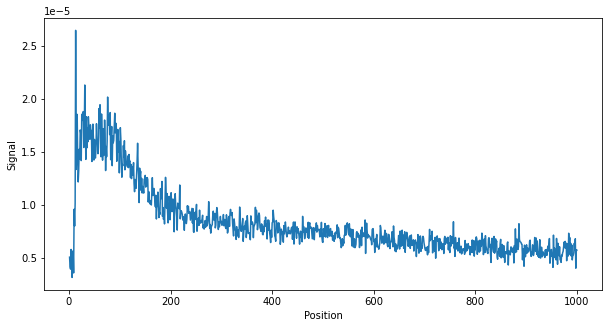

In [43]:
plt.figure(figsize = (10,5))
plotdata=pd.DataFrame({'Position': np.arange(1,1001),
                      'Signal': standerized_multi_transcript_vector})
sns.lineplot(data=plotdata,x='Position',y='Signal').get_figure().savefig('multi_transcript_standerized_signal_1000_all5.pdf')

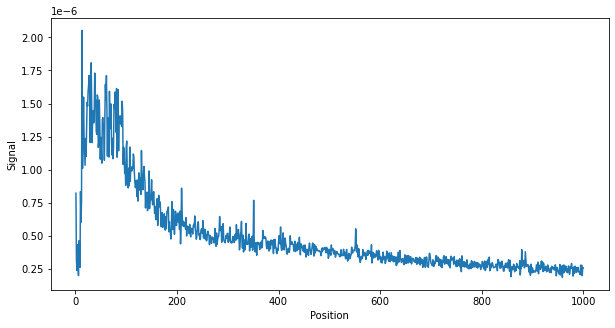

In [44]:
plt.figure(figsize = (10,5))
plotdata=pd.DataFrame({'Position': np.arange(1,1001),
                      'Signal': normalized_multi_transcript_vector})
sns.lineplot(data=plotdata,x='Position',y='Signal').get_figure().savefig('multi_transcript_normalized_signal_1000_all5.pdf')

min position: 0
max position: 10584
90% cutoff: 401.0
95% cutoff: 879.049999999999
99% cutoff: 3538.38


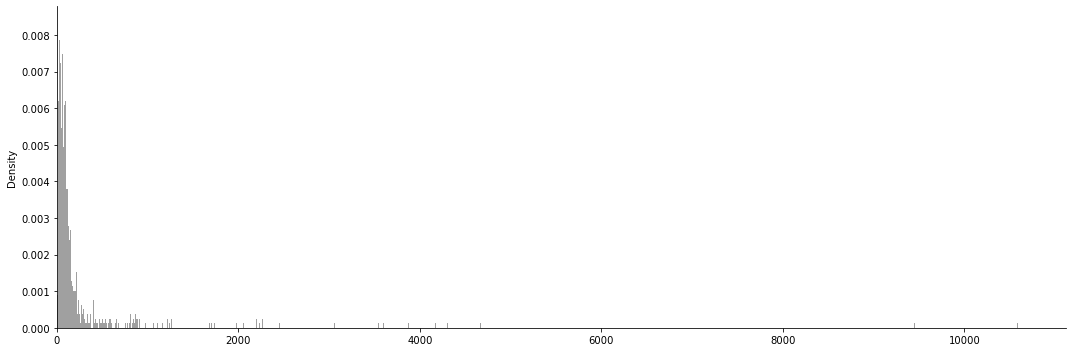

In [90]:
#画最高峰的位置分布图
max_peak_positions=np.array([np.argmax(i) for i in all_vectors])
print('min position:',np.min(max_peak_positions))
print('max position:',np.max(max_peak_positions))
print('90% cutoff:',np.quantile(max_peak_positions,0.9))
print('95% cutoff:',np.quantile(max_peak_positions,0.95))
sns.displot(max_peak_positions,color='grey',stat='density',aspect=3,linewidth=0,binwidth=5).set(xlim=(0,None)).savefig('max_peak_positions_distribution_all50.pdf')
#sns.kdeplot(data=max_peak_positions,color='blue',bw_adjust=0.1,clip=(0,1000)).get_figure().savefig('max_peak_positions_distribution_all5.pdf')

In [92]:
#查看那些极端的的转录本：
max_peak_position_high_index=[i for i in range(len(all_vectors)) if max_peak_positions[i]>1000]
print('There are',len(max_peak_position_high_index),'max peak position high transcripts.')
used_meta.iloc[high_index]

There are 67 max peak position high transcripts.


,ID,Parent,transcript_id,gene_id,gene_type,gene_name,transcript_type,transcript_name
6,ENST00000011619.6,ENSG00000010017.13,ENST00000011619.6,ENSG00000010017.13,protein_coding,RANBP9,protein_coding,RANBP9-201
9,ENST00000025301.4,ENSG00000023516.9,ENST00000025301.4,ENSG00000023516.9,protein_coding,AKAP11,protein_coding,AKAP11-201
50,ENST00000216264.13,ENSG00000100422.14,ENST00000216264.13,ENSG00000100422.14,protein_coding,CERK,protein_coding,CERK-201
77,ENST00000221130.11,ENSG00000104687.14,ENST00000221130.11,ENSG00000104687.14,protein_coding,GSR,protein_coding,GSR-201
96,ENST00000224784.10,ENSG00000107796.13,ENST00000224784.10,ENSG00000107796.13,protein_coding,ACTA2,protein_coding,ACTA2-201
...,...,...,...,...,...,...,...,...
1478,ENST00000579991.3,ENSG00000264364.3,ENST00000579991.3,ENSG00000264364.3,protein_coding,DYNLL2,protein_coding,DYNLL2-201
1535,ENST00000618852.5,ENSG00000158195.11,ENST00000618852.5,ENSG00000158195.11,protein_coding,WASF2,protein_coding,WASF2-202
1536,ENST00000619039.5,ENSG00000276293.5,ENST00000619039.5,ENSG00000276293.5,protein_coding,PIP4K2B,protein_coding,PIP4K2B-204
1547,ENST00000645481.2,ENSG00000137273.6,ENST00000645481.2,ENSG00000137273.6,protein_coding,FOXF2,protein_coding,FOXF2-201


In [93]:
test=-1

In [95]:
test+=1
inspect(max_peak_position_high_index[test])

test: 9
ENST00000025301.4
TPM: 17.398738939999998
sum signal: 9.249711517723181
sum first 50 TIS signal: 0.18829441409244344


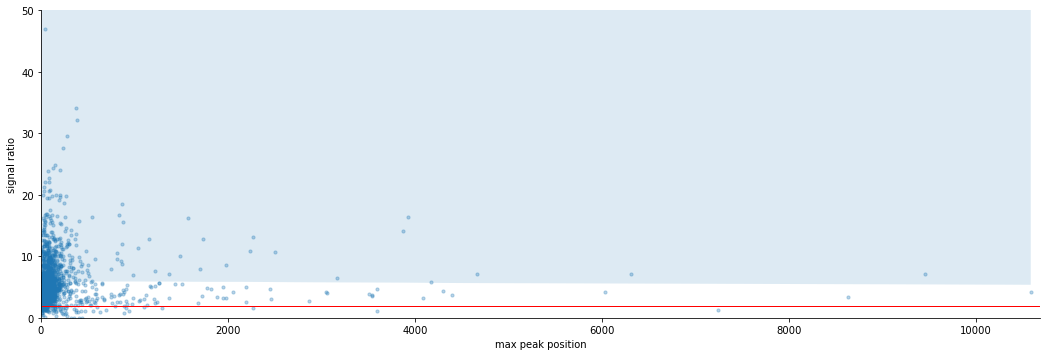

In [145]:
#取前300个碱基计算TIS位点signal和非TIS位点signal均值的比
sig_ratio=[np.mean(all_vectors[i][find_TIS(fa[all_transcripts[i]][0:302])])/(0.0000001+np.mean(all_vectors[i][list(set(range(min(300,len(all_vectors[i]))))-set(find_TIS(fa[all_transcripts[i]][0:302])))])) for i in range(len(all_transcripts))]
sns.lmplot(data=pd.DataFrame({'signal ratio': np.array(sig_ratio),'max peak position': max_peak_positions}),x='max peak position',y='signal ratio',scatter_kws={"s": 10, "alpha": 0.3},aspect=3).set(xlim=(0,np.max(max_peak_positions)+100),ylim=(0,50))
plt.hlines(2, 0, np.max(max_peak_positions)+100,colors='red',linewidths=1)

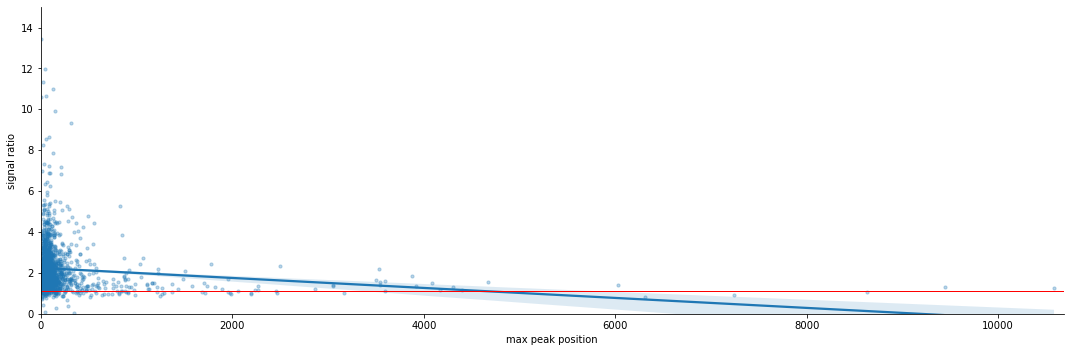

In [146]:
#取前转录本全长计算TIS位点signal和非TIS位点signal均值的比
sig_ratio=[np.mean(all_vectors[i][find_TIS(fa[all_transcripts[i]])])/(0.0000001+np.mean(all_vectors[i][list(set(range(len(all_vectors[i])))-set(find_TIS(fa[all_transcripts[i]])))])) for i in range(len(all_transcripts))]
sns.lmplot(data=pd.DataFrame({'signal ratio': np.array(sig_ratio),'max peak position': max_peak_positions}),x='max peak position',y='signal ratio',scatter_kws={"s": 10, "alpha": 0.3},aspect=3).set(xlim=(0,np.max(max_peak_positions)+100),ylim=(0,15))
plt.hlines(1.1, 0, np.max(max_peak_positions)+100,colors='red',linewidths=1)

In [156]:
# #对max_peak_positions>300的转录本进行功能富集分析
# max_peak_position_higher_than_300_transcripts_id=[all_transcripts[i] for i in range(len(all_transcripts)) if max_peak_positions[i]>300]
# print(len(max_peak_position_higher_than_300_transcripts))
# with open("max_peak_position_higher_than_300_transcripts.txt", 'w') as output:
#     for row in max_peak_position_higher_than_300_transcripts:
#         output.write(row.split('.')[0] + '\n')
# with open("all_transcripts.txt", 'w') as output:
#     for row in all_transcripts:
#         output.write(row.split('.')[0] + '\n')

204


In [157]:
with open('final_transcripts_all5.pkl','wb') as file:
    pickle.dump(all_transcripts, file)
with open('final_raw_vectors_all5.pkl','wb') as file:
    pickle.dump(all_raw_vectors, file)
with open('final_vectors_all5.pkl','wb') as file:
    pickle.dump(all_vectors, file)
with open('final_TPMs_all5.pkl','wb') as file:
    pickle.dump(all_TPMs, file)